In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import ReceptiveField
import pickle
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from NRC import NRC, recordModule, RegularizedRF
from utils import returnFFT, returnPSD, returnSpec
from scipy import stats
import random


In [2]:
srate = 240
tmin, tmax = -0.2, .6
expName = 'dense'
chnNames = ['PZ', 'PO5', 'POZ', 'PO4','PO3','PO6', 'O1', 'OZ','O2']

random.seed(253)

dir = './datasets/%s.pickle' % expName
with open(dir, "rb") as fp:
    wholeset = pickle.load(fp)

tag = 'wn'

In [3]:
X = wholeset[0][tag]['X'][:,-10:,:120]
S = wholeset[0][tag]['STI']
y = wholeset[0][tag]['y']

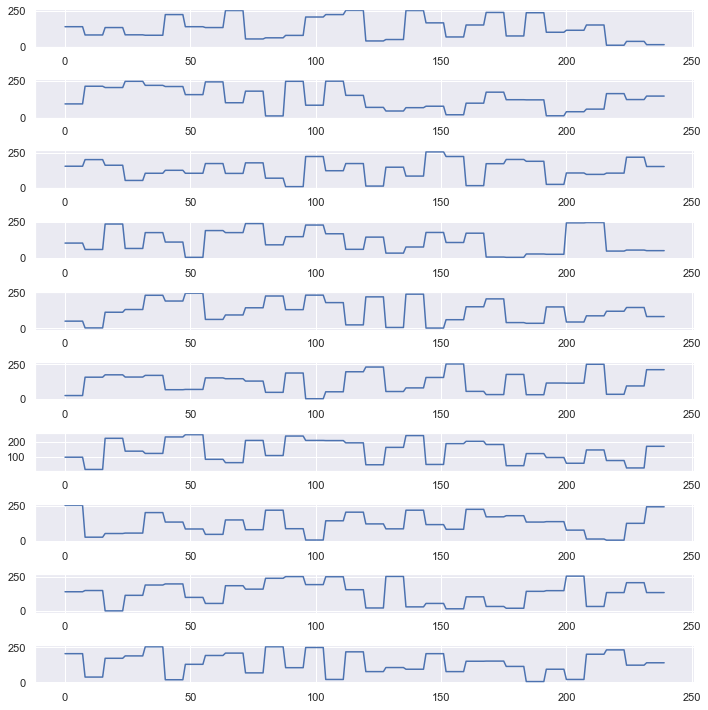

In [11]:
sns.set_theme()
f,axes = plt.subplots(ncols=1,nrows=10,figsize=(10,10))
for (s,ax) in zip(S[160:],axes):
    ax.plot(s)
plt.tight_layout()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_43783/492468392.py:1: RuntimeWarning: Mean of empty slice.
  plt.plot(X[y==60].mean(axis=(0,1)).T)
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


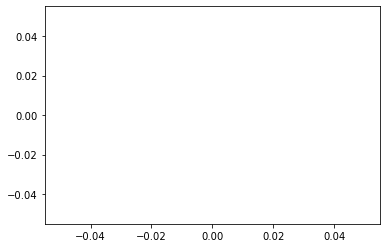

In [10]:
plt.plot(X[y==60].mean(axis=(0,1)).T)

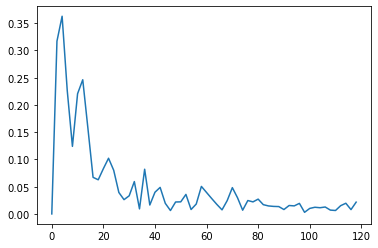

In [51]:
f,s = returnFFT(X[y==40].mean(axis=(0,1)),srate=240)
plt.plot(f,s)